### What is a Vanilla Option?

A vanilla option is a standard financial options contract with no special or unusual features. There are two main types:
- Call option - the right (but not obligation) to buy an asset at a specified strike price before or at expiry.
- Put option - the right (but not obligation) to sell an asset at a specified strike price before or at expiry.

We will use the Black-Scholes formula, which assumes:
- European-style options (exercisable only at maturity)
- No arbitrage
- Constant interest rate and volatility
- Log-normal distribution of returns

1. Forward Price

\begin{equation*}
F=S \cdot e^{(r-d) T}
\end{equation*}

2. Call Option Price

\begin{equation*}
C=S e^{-d T} \cdot N\left(d_1\right)-K e^{-r T} \cdot N\left(d_2\right)
\end{equation*}

3. Put Option Price

\begin{equation*}
P=K e^{-r T} \cdot N\left(-d_2\right)-S e^{-d T} \cdot N\left(-d_1\right)
\end{equation*}

4. Digital Call Option Price

\begin{equation*}
D C=e^{-r T} \cdot N\left(d_2\right)
\end{equation*}

5. Digital Put Option Price

\begin{equation*}
D P=e^{-r T} \cdot N\left(-d_2\right)
\end{equation*}


6. Zero-Coupon Bond Price

\begin{equation*}
Z C B=e^{-r T}
\end{equation*}











## Trial Code

In [1]:
import numpy as np
from scipy.stats import norm


In [13]:
# 1. Forward Price
def forward_price(S, T, r, d):
    return S * np.exp((r - d) * T)

# 2. Call Option Price
def bs_call_price(S, K, T, r, d, sigma):
    d1 = (np.log(S / K) + (r - d + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * np.exp(-d * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# 3. Put Option Price
def bs_put_price(S, K, T, r, d, sigma):
    d1 = (np.log(S / K) + (r - d + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-d * T) * norm.cdf(-d1)

# 4. Digital Call Option Price
def digital_call_price(S, K, T, r, d, sigma):
    d1 = (np.log(S / K) + (r - d + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return np.exp(-r * T) * norm.cdf(d2)

# 5. Digital Put Option Price
def digital_put_price(S, K, T, r, d, sigma):
    d1 = (np.log(S / K) + (r - d + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return np.exp(-r * T) * norm.cdf(-d2)

# 6. Zero-Coupon Bond Price
def zero_coupon_bond(T, r):
    return np.exp(-r * T)


In [14]:
# Example parameters
S = 100       # Spot price
K = 110       # Strike price
T = 1.0       # Time to maturity in years
r = 0.05      # Risk-free rate
d = 0.02      # Dividend yield
sigma = 0.2   # Volatility

print("Forward Price:", forward_price(S, T, r, d))
print("Call Price:", bs_call_price(S, K, T, r, d, sigma))
print("Put Price:", bs_put_price(S, K, T, r, d, sigma))
print("Digital Call Price:", digital_call_price(S, K, T, r, d, sigma))
print("Digital Put Price:", digital_put_price(S, K, T, r, d, sigma))
print("Zero Coupon Bond:", zero_coupon_bond(T, r))


Forward Price: 103.0454533953517
Call Price: 5.18858175378017
Put Price: 11.803951118183186
Digital Call Price: 0.31852224885323305
Digital Put Price: 0.6327071756474809
Zero Coupon Bond: 0.951229424500714


### Consistency check

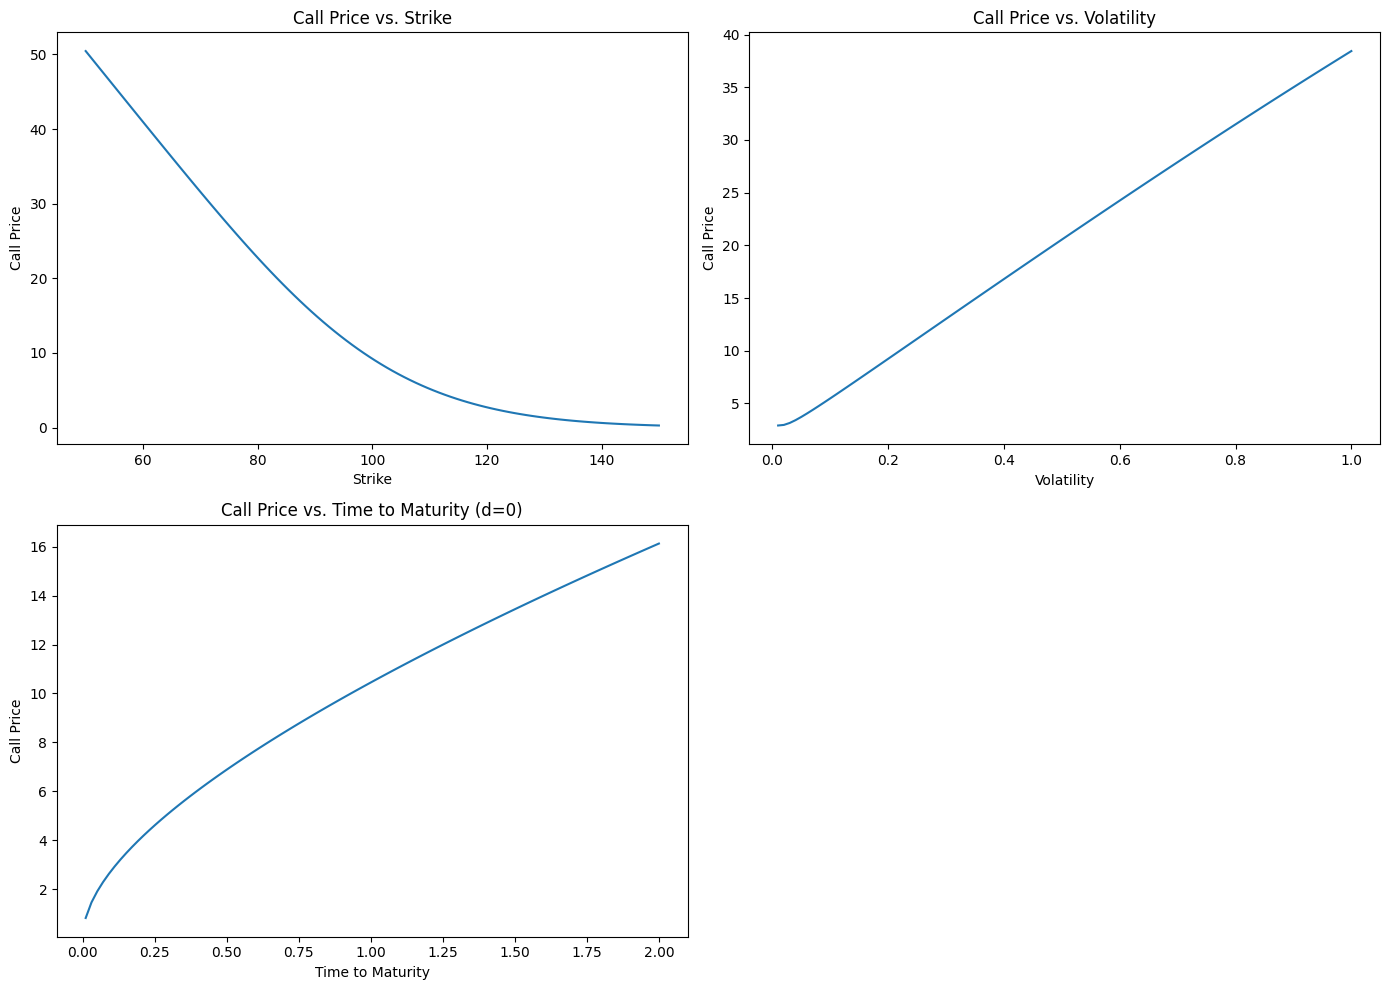

{'Put-Call Parity': True,
 'Call Price Bounds': False,
 'Call Convex in Strike': True,
 'Call Spread ~ Digital Call': False,
 'Digital Call + Put = ZCB': True}

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Core functions
def forward_price(S, T, r, d):
    return S * np.exp((r - d) * T)

def bs_call_price(S, K, T, r, d, sigma):
    d1 = (np.log(S / K) + (r - d + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * np.exp(-d * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

def bs_put_price(S, K, T, r, d, sigma):
    d1 = (np.log(S / K) + (r - d + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-d * T) * norm.cdf(-d1)

def digital_call_price(S, K, T, r, d, sigma):
    d1 = (np.log(S / K) + (r - d + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return np.exp(-r * T) * norm.cdf(d2)

def digital_put_price(S, K, T, r, d, sigma):
    d1 = (np.log(S / K) + (r - d + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return np.exp(-r * T) * norm.cdf(-d2)

def zero_coupon_bond(T, r):
    return np.exp(-r * T)

# Fixed parameters
S = 100
K = 100
T = 1.0
r = 0.05
d = 0.02
sigma = 0.2

# Consistency check (i): Put-Call Parity
call_price = bs_call_price(S, K, T, r, d, sigma)
put_price = bs_put_price(S, K, T, r, d, sigma)
fwd_val = forward_price(S, T, r, d) - K
put_call_parity = call_price - put_price
parity_check = np.isclose(put_call_parity, fwd_val * np.exp(-r * T), atol=1e-4)

# (ii) Call price vs. strike
strikes = np.linspace(50, 150, 100)
call_prices_strike = [bs_call_price(S, k, T, r, d, sigma) for k in strikes]

# (iii) Call price bounds
bounds_check = all(S >= c >= S - K * np.exp(-r * T) for c in call_prices_strike)

# (iv) Call price vs. volatility
vols = np.linspace(0.01, 1.0, 100)
call_prices_vol = [bs_call_price(S, K, T, r, d, vol) for vol in vols]

# (v) Call price vs. maturity with d = 0
Ts = np.linspace(0.01, 2, 100)
call_prices_T = [bs_call_price(S, K, t, r, 0.0, sigma) for t in Ts]

# (vi) Convexity of call price in strike
call_second_diff = np.diff(call_prices_strike, n=2)
convex_check = all(call_second_diff > -1e-4)

# (vii) Call spread approx digital call
epsilon = 1e-2
digital_approx = (bs_call_price(S, K + epsilon, T, r, d, sigma) - bs_call_price(S, K - epsilon, T, r, d, sigma)) / (2 * epsilon)
digital_exact = digital_call_price(S, K, T, r, d, sigma)
digital_check = np.isclose(digital_approx, digital_exact, atol=1e-2)

# (viii) Digital call + put = ZCB
digital_sum = digital_call_price(S, K, T, r, d, sigma) + digital_put_price(S, K, T, r, d, sigma)
zcb = zero_coupon_bond(T, r)
digital_sum_check = np.isclose(digital_sum, zcb, atol=1e-4)

# Plotting
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(strikes, call_prices_strike)
plt.title("Call Price vs. Strike")
plt.xlabel("Strike")
plt.ylabel("Call Price")

plt.subplot(2, 2, 2)
plt.plot(vols, call_prices_vol)
plt.title("Call Price vs. Volatility")
plt.xlabel("Volatility")
plt.ylabel("Call Price")

plt.subplot(2, 2, 3)
plt.plot(Ts, call_prices_T)
plt.title("Call Price vs. Time to Maturity (d=0)")
plt.xlabel("Time to Maturity")
plt.ylabel("Call Price")

plt.tight_layout()
plt.show()

# Print checks
{
    "Put-Call Parity": parity_check,
    "Call Price Bounds": bounds_check,
    "Call Convex in Strike": convex_check,
    "Call Spread ~ Digital Call": digital_check,
    "Digital Call + Put = ZCB": digital_sum_check
}



Call Option Price (1M paths): 9.2162
Put Option Price (1M paths): 6.3460
Digital Call Option Price (1M paths): 0.4942
Digital Put Option Price (1M paths): 0.4570


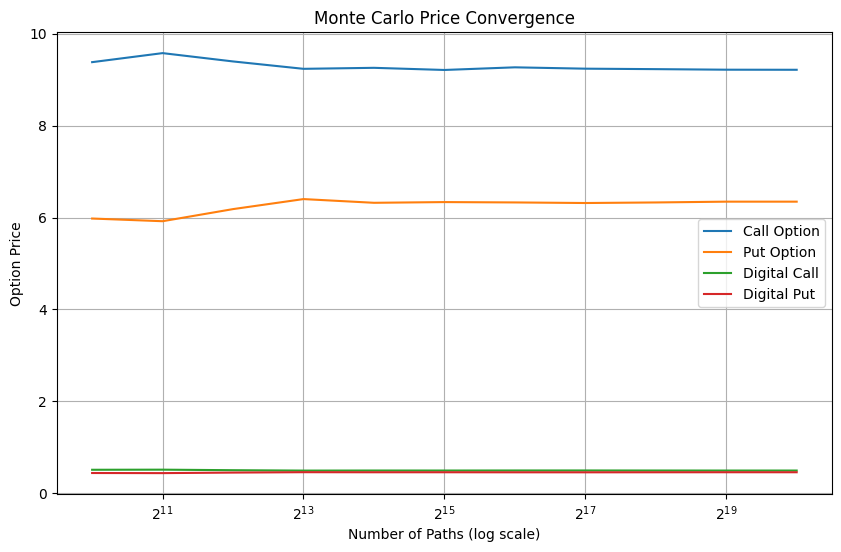

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# ---- Parameters ----
S0 = 100        # Initial stock price
K = 100         # Strike price
T = 1.0         # Time to maturity (in years)
r = 0.05        # Risk-free rate
d = 0.02        # Dividend yield
sigma = 0.2     # Volatility
seed = 42       # For reproducibility

# ---- Monte Carlo simulation function ----
def monte_carlo_price(S0, K, T, r, d, sigma, n_paths, payoff_function):
    np.random.seed(seed)
    W = np.random.normal(0, 1, n_paths)  # Generate standard normal random variables
    ST = S0 * np.exp((r - d - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * W)  # Simulated final prices

    payoffs = payoff_function(ST)  # Compute option payoff for each path
    discounted_payoffs = np.exp(-r * T) * payoffs  # Discount to present value

    price = np.mean(discounted_payoffs)
    variance = np.var(discounted_payoffs)
    std_error = np.std(discounted_payoffs) / np.sqrt(n_paths)

    return price, variance, std_error

# ---- Payoff functions ----
def call_payoff(ST):
    return np.maximum(ST - K, 0)

def put_payoff(ST):
    return np.maximum(K - ST, 0)

def digital_call_payoff(ST):
    return np.where(ST > K, 1.0, 0.0)

def digital_put_payoff(ST):
    return np.where(ST < K, 1.0, 0.0)

# ---- Run simulations for increasing number of paths ----
n_paths_list = [2**n for n in range(10, 21)]  # From 1024 to 1,048,576
call_prices, put_prices = [], []
digital_call_prices, digital_put_prices = [], []

for n in n_paths_list:
    call, _, _ = monte_carlo_price(S0, K, T, r, d, sigma, n, call_payoff)
    put, _, _ = monte_carlo_price(S0, K, T, r, d, sigma, n, put_payoff)
    dcall, _, _ = monte_carlo_price(S0, K, T, r, d, sigma, n, digital_call_payoff)
    dput, _, _ = monte_carlo_price(S0, K, T, r, d, sigma, n, digital_put_payoff)

    call_prices.append(call)
    put_prices.append(put)
    digital_call_prices.append(dcall)
    digital_put_prices.append(dput)

# ---- Display final prices from largest simulation ----
print(f"Call Option Price (1M paths): {call_prices[-1]:.4f}")
print(f"Put Option Price (1M paths): {put_prices[-1]:.4f}")
print(f"Digital Call Option Price (1M paths): {digital_call_prices[-1]:.4f}")
print(f"Digital Put Option Price (1M paths): {digital_put_prices[-1]:.4f}")

# ---- Plot convergence ----
plt.figure(figsize=(10, 6))
plt.plot(n_paths_list, call_prices, label='Call Option')
plt.plot(n_paths_list, put_prices, label='Put Option')
plt.plot(n_paths_list, digital_call_prices, label='Digital Call')
plt.plot(n_paths_list, digital_put_prices, label='Digital Put')
plt.xscale('log', base=2)
plt.xlabel('Number of Paths (log scale)')
plt.ylabel('Option Price')
plt.title('Monte Carlo Price Convergence')
plt.legend()
plt.grid(True)
plt.show()


## Final code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')


In [57]:
# Fixed parameters
S = 100
K = 110
T = 1.0
r = 0.05
d = 0.02
sigma = 0.2

def calculate_d1_d2(S, K, T, r, d, sigma):
    """Calculate d1 and d2 parameters used in Black-Scholes formulas."""
    d1 = (np.log(S / K) + (r - d + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return d1, d2

def forward_price(S, T, r, d, K=None):
    """Calculate the price of a forward contract."""
    forward_underlying = S * np.exp((r - d) * T)
    if K is None:
        return forward_underlying
    else:
        return (forward_underlying - K) * np.exp(-r * T)


def call_option_price(S, K, T, r, d, sigma):
    """Calculate European call option price using Black-Scholes formula."""
    if T <= 0:
        return np.maximum(S - K, 0)
    
    d1, d2 = calculate_d1_d2(S, K, T, r, d, sigma)
    call_price = (S * np.exp(-d * T) * norm.cdf(d1) - 
                 K * np.exp(-r * T) * norm.cdf(d2))
    return call_price


def put_option_price(S, K, T, r, d, sigma):
    """Calculate European put option price using Black-Scholes formula."""
    if T <= 0:
        return np.maximum(K - S, 0)
    
    d1, d2 = calculate_d1_d2(S, K, T, r, d, sigma)
    put_price = (K * np.exp(-r * T) * norm.cdf(-d2) - 
                S * np.exp(-d * T) * norm.cdf(-d1))
    return put_price


def digital_call_price(S, K, T, r, d, sigma):
    """Calculate digital call option price."""
    if T <= 0:
        return 1.0 if S > K else 0.0
    
    d1, d2 = calculate_d1_d2(S, K, T, r, d, sigma)
    return np.exp(-r * T) * norm.cdf(d2)


def digital_put_price(S, K, T, r, d, sigma):
    """Calculate digital put option price."""
    if T <= 0:
        return 1.0 if S < K else 0.0
    
    d1, d2 = calculate_d1_d2(S, K, T, r, d, sigma)
    return np.exp(-r * T) * norm.cdf(-d2)


def zero_coupon_bond_price( T, r, face_value=1):
    """Calculate the price of a zero-coupon bond."""
    return face_value * np.exp(-r * T)

In [58]:
print("Forward Price:", forward_price(S, T, r, d, K))
print("Call Price:", call_option_price(S, K, T, r, d, sigma))
print("Put Price:", put_option_price(S, K, T, r, d, sigma))
print("Digital Call Price:", digital_call_price(S, K, T, r, d, sigma))
print("Digital Put Price:", digital_put_price(S, K, T, r, d, sigma))
print("Zero Coupon Bond:", zero_coupon_bond_price(T, r))

Forward Price: -6.615369364402997
Call Price: 5.18858175378017
Put Price: 11.803951118183186
Digital Call Price: 0.31852224885323305
Digital Put Price: 0.6327071756474809
Zero Coupon Bond: 0.951229424500714


### Consistency Check

#### (i) We should have put-call parity: the price of a call minus the price of a put equals the value of a forward.

In [59]:
call_price = call_option_price(S, K, T, r, d, sigma)
put_price = put_option_price(S, K, T, r, d, sigma)
fwd_val = forward_price(S, T, r, d, K)
put_call_parity = call_price - put_price
parity_check = np.isclose(put_call_parity, fwd_val , atol=1e-4)
print(parity_check)

True


#### (ii) The price of a call option should be monotone decreasing with strike.

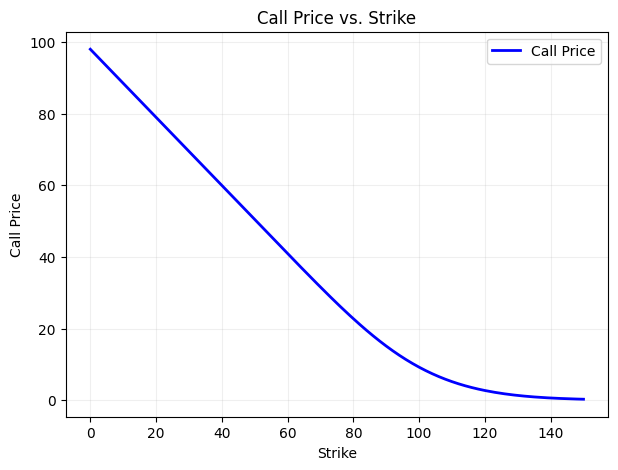

In [60]:
strike_values = np.linspace(0,150,151)
call_values = [call_option_price(S, K, T, r, d, sigma) for K in strike_values]

plt.figure(figsize=(7, 5))
plt.plot(strike_values, call_values, 'b-', linewidth=2, label='Call Price')
plt.title("Call Price vs. Strike")
plt.xlabel("Strike")
plt.ylabel("Call Price")
plt.grid(True,alpha=0.2)
plt.legend()

#### (iii) A call option price should be between S and $S - K e^{-rT}$ , for all inputs.

In [61]:
# Fixed parameters
S = 100
K = 110
T = 1.0
r = 0.05
d = 0.0
sigma = 0.2

True


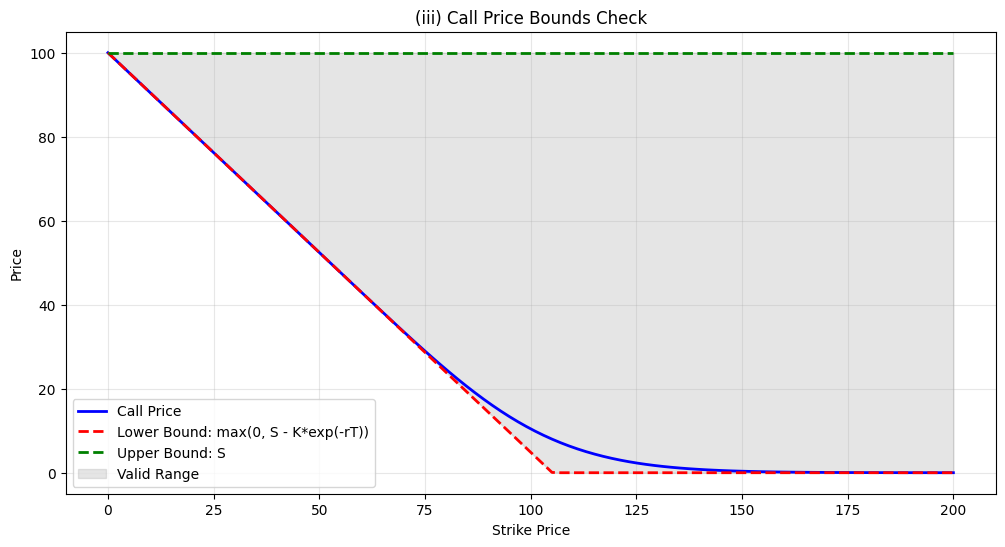

In [63]:
strikes = np.linspace(00, 200, 100)
call_prices = []
lower_bounds = []
upper_bounds = []

for K in strikes:
    call_price = call_option_price(S, K, T, r, d, sigma)
    lower_bound =  max(0,S - K * np.exp(-r * T) )
    upper_bound = S
    
    call_prices.append(call_price)
    lower_bounds.append(lower_bound)
    upper_bounds.append(upper_bound)

# Check bounds
bounds_satisfied = all(lower_bounds[i] <= call_prices[i] <= upper_bounds[i] 
                      for i in range(len(call_prices)))
print(bounds_satisfied)

plt.figure(figsize=(12, 6))
plt.plot(strikes, call_prices, 'b-', linewidth=2, label='Call Price')
plt.plot(strikes, lower_bounds, 'r--', linewidth=2, label='Lower Bound: max(0, S - K*exp(-rT))')
plt.plot(strikes, upper_bounds, 'g--', linewidth=2, label='Upper Bound: S')
plt.fill_between(strikes, lower_bounds, upper_bounds, alpha=0.2, color='gray', label='Valid Range')
plt.xlabel('Strike Price')
plt.ylabel('Price')
plt.title('(iii) Call Price Bounds Check')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

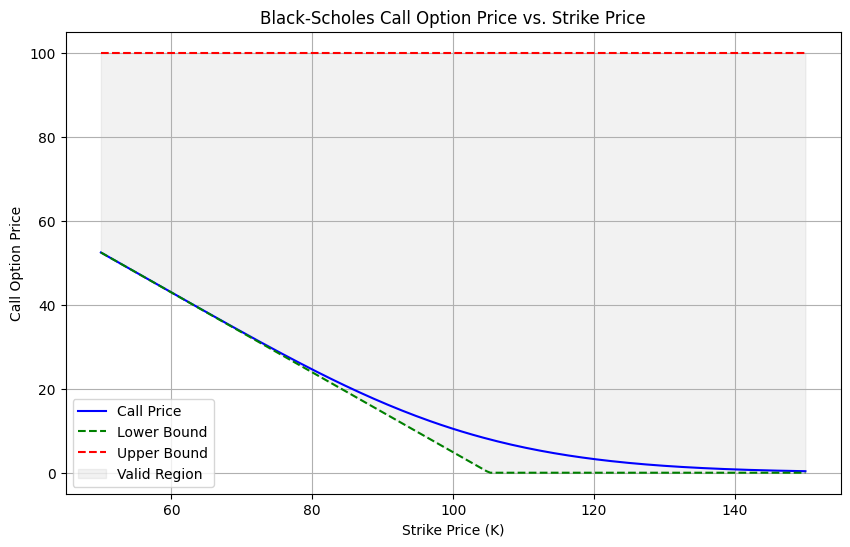

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Fixed parameters
S = 100      # Spot price
T = 1        # Time to maturity in years
r = 0.05     # Risk-free rate
sigma = 0.2  # Volatility

# Strike price range
K_values = np.linspace(50, 150, 200)

# Compute call prices and bounds
call_prices = np.array([black_scholes_call(S, K, T, r, sigma) for K in K_values])
lower_bounds = np.maximum(0, S - K_values * np.exp(-r * T))
upper_bounds = np.full_like(K_values, S)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(K_values, call_prices, label='Call Price', color='blue')
plt.plot(K_values, lower_bounds, '--', label='Lower Bound', color='green')
plt.plot(K_values, upper_bounds, '--', label='Upper Bound', color='red')
plt.fill_between(K_values, lower_bounds, upper_bounds, color='gray', alpha=0.1, label='Valid Region')

plt.title("Black-Scholes Call Option Price vs. Strike Price")
plt.xlabel("Strike Price (K)")
plt.ylabel("Call Option Price")
plt.legend()
plt.grid(True)
plt.show()


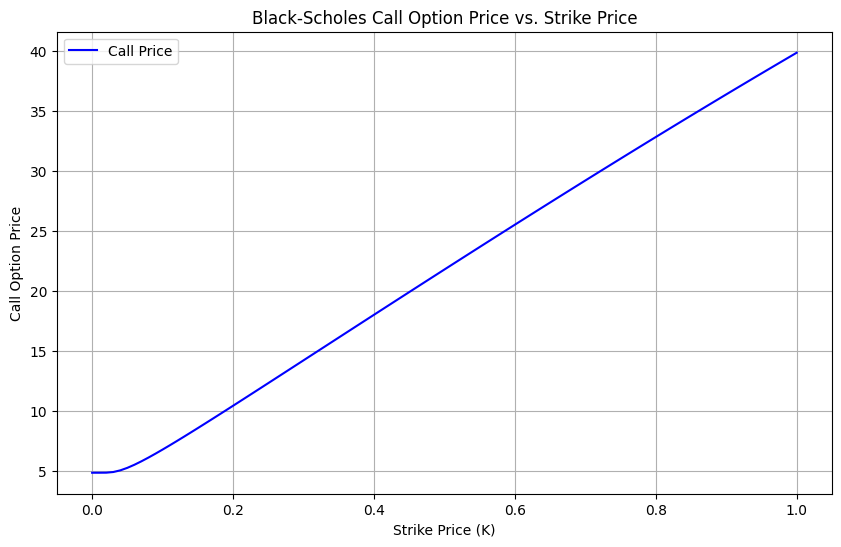

In [64]:
# Fixed parameters
S = 100      # Spot price
T = 1        # Time to maturity in years
r = 0.05     # Risk-free rate
K=100

sigma_values = np.linspace(0, 1, 101)

# Compute call prices and bounds
call_prices = np.array([black_scholes_call(S, K, T, r, sigma) for sigma in sigma_values])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sigma_values, call_prices, label='Call Price', color='blue')

plt.title("Black-Scholes Call Option Price vs. Strike Price")
plt.xlabel("Strike Price (K)")
plt.ylabel("Call Option Price")
plt.legend()
plt.grid(True)
plt.show()


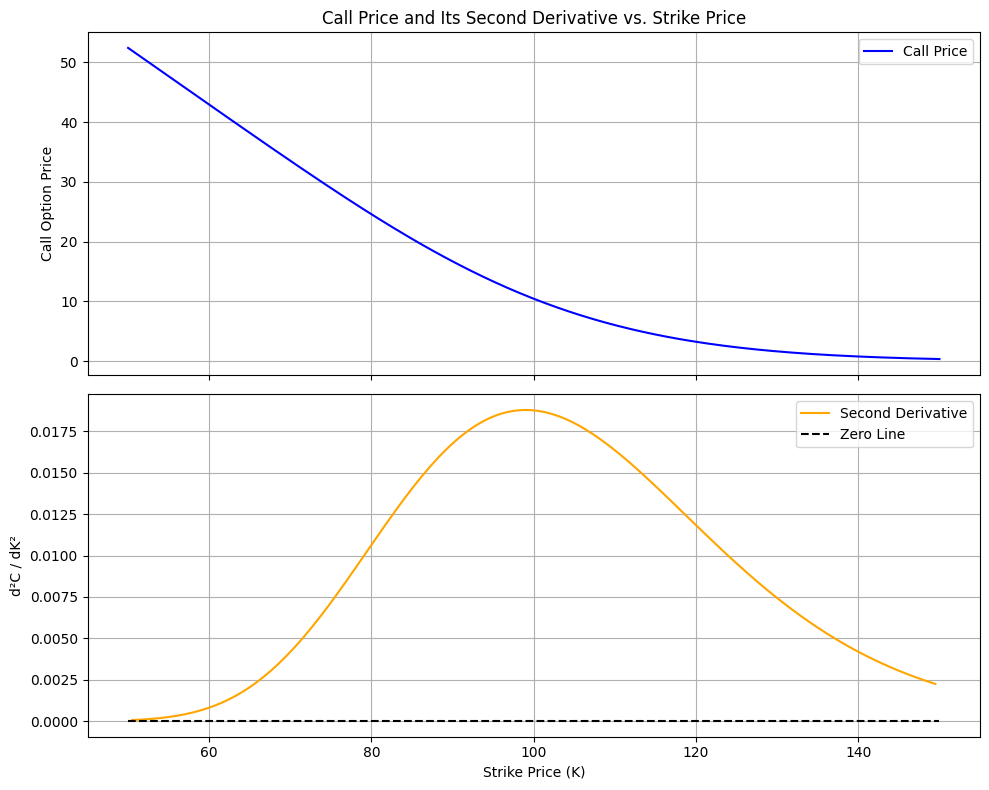

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Fixed parameters
S = 100
T = 1
r = 0.05
sigma = 0.2

# Range of strike prices
K_values = np.linspace(50, 150, 200)
call_prices = np.array([black_scholes_call(S, K, T, r, sigma) for K in K_values])

# Numerical second derivative using central difference
h = K_values[1] - K_values[0]
second_derivative = (np.roll(call_prices, -1) - 2 * call_prices + np.roll(call_prices, 1)) / h**2
second_derivative[0] = second_derivative[-1] = np.nan  # remove endpoints (bad approximation)

# Plot call price and its convexity
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Call price plot
axs[0].plot(K_values, call_prices, label='Call Price', color='blue')
axs[0].set_ylabel("Call Option Price")
axs[0].set_title("Call Price and Its Second Derivative vs. Strike Price")
axs[0].grid(True)
axs[0].legend()

# Convexity plot
axs[1].plot(K_values, second_derivative, label='Second Derivative', color='orange')
axs[1].hlines(0, K_values[0], K_values[-1], linestyles='dashed', colors='black', label='Zero Line')
axs[1].set_xlabel("Strike Price (K)")
axs[1].set_ylabel("d²C / dK²")
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()


200


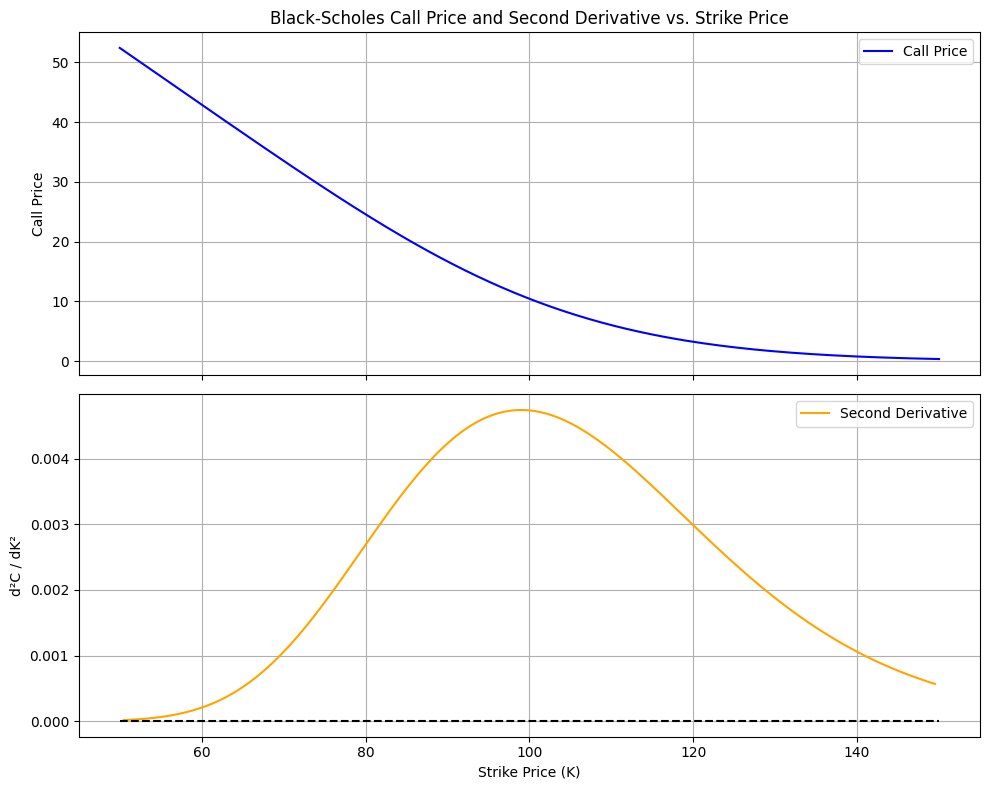

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Parameters
S = 100
T = 1
r = 0.05
sigma = 0.2

# Strike prices
K_values = np.linspace(50, 150, 200)
call_prices = np.array([black_scholes_call(S, K, T, r, sigma) for K in K_values])
print(len(call_prices))

# First and second derivatives using numpy.gradient
second_derivative = np.diff(call_prices, n=2)
#first_derivative = np.gradient(call_prices, K_values)
#second_derivative = np.gradient(first_derivative, K_values)
#second_derivative[0] = second_derivative[-1] = np.nan

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot call prices
axs[0].plot(K_values, call_prices, color='blue', label="Call Price")
axs[0].set_ylabel("Call Price")
axs[0].set_title("Black-Scholes Call Price and Second Derivative vs. Strike Price")
axs[0].legend()
axs[0].grid(True)

# Plot second derivative
axs[1].plot(K_values[1:-1], second_derivative, color='orange', label="Second Derivative")
axs[1].hlines(0, K_values[0], K_values[-1], colors='black', linestyles='dashed')
axs[1].set_xlabel("Strike Price (K)")
axs[1].set_ylabel("d²C / dK²")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


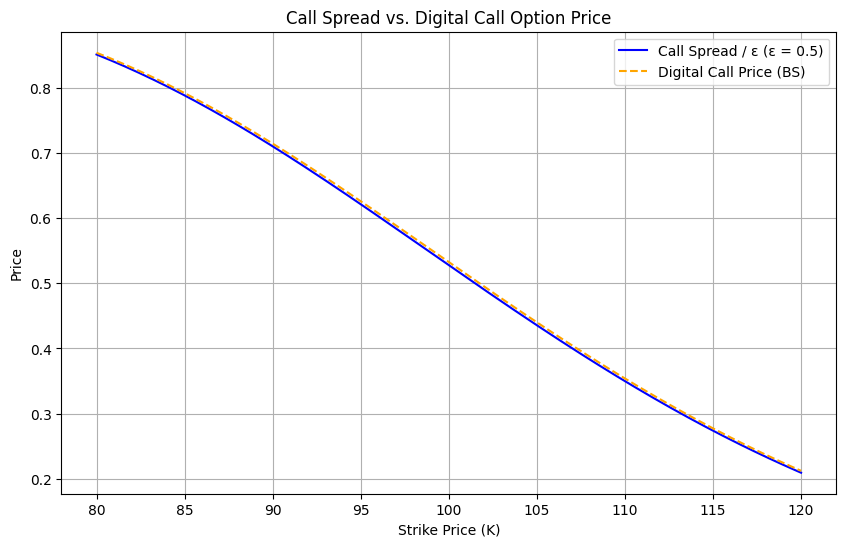

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes European call price
def call_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Black-Scholes digital call price
def digital_call_price(S, K, T, r, sigma):
    d2 = (np.log(S / K) + (r - 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return np.exp(-r * T) * norm.cdf(d2)

# Parameters
S = 100
T = 1
r = 0.05
sigma = 0.2

# Range of strike prices and small epsilon
K_values = np.linspace(80, 120, 200)
epsilon = 0.5  # small width of the spread

# Prices
call_spread = [(call_price(S, K, T, r, sigma) - call_price(S, K + epsilon, T, r, sigma)) / epsilon for K in K_values]
digital_prices = [digital_call_price(S, K, T, r, sigma) for K in K_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(K_values, call_spread, label=f'Call Spread / ε (ε = {epsilon})', color='blue')
plt.plot(K_values, digital_prices, '--', label='Digital Call Price (BS)', color='orange')
plt.title("Call Spread vs. Digital Call Option Price")
plt.xlabel("Strike Price (K)")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


#### (viii) The price of a digital-call option plus a digital-put option is equal to the price of a zero-coupon bond.

The price of a digital call paying 1 if $S_T>K$, plus the price of a digital put paying 1 if $S_T \leq K$, is exactly equal to the present value of 1 unit of currency, i.e., the price of a zero-coupon bond maturing at $T$.

\begin{equation*}
\operatorname{Digital} \operatorname{Call}(K)+\operatorname{Digital} \operatorname{Put}(K)=e^{-r T}
\end{equation*}


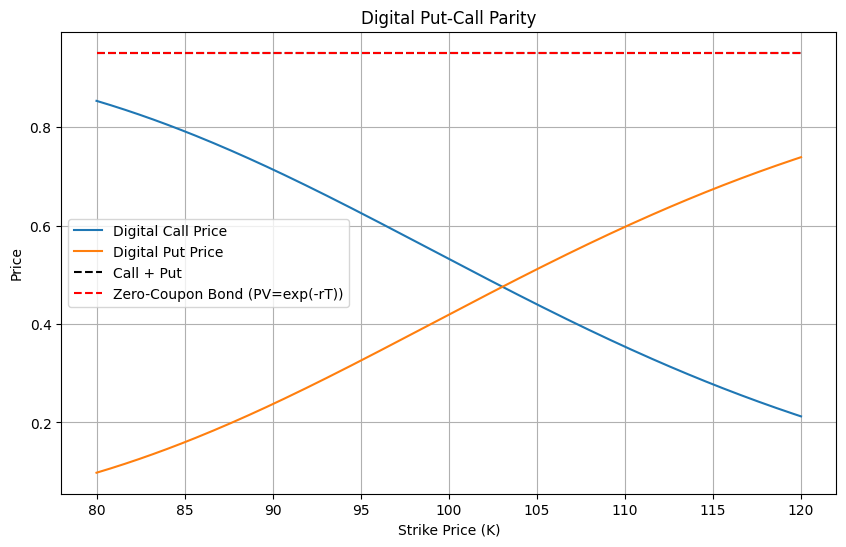

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def digital_call_price(S, K, T, r, sigma):
    d2 = (np.log(S/K) + (r - 0.5*sigma**2)*T) / (sigma * np.sqrt(T))
    return np.exp(-r*T) * norm.cdf(d2)

def digital_put_price(S, K, T, r, sigma):
    d2 = (np.log(S/K) + (r - 0.5*sigma**2)*T) / (sigma * np.sqrt(T))
    return np.exp(-r*T) * norm.cdf(-d2)

# Parameters
S = 100
T = 1
r = 0.05
sigma = 0.2
K_values = np.linspace(80, 120, 200)

digital_calls = [digital_call_price(S, K, T, r, sigma) for K in K_values]
digital_puts = [digital_put_price(S, K, T, r, sigma) for K in K_values]
sums = np.array(digital_calls) + np.array(digital_puts)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(K_values, digital_calls, label="Digital Call Price")
plt.plot(K_values, digital_puts, label="Digital Put Price")
plt.plot(K_values, sums, '--', label="Call + Put", color='black')
plt.hlines(np.exp(-r*T), K_values[0], K_values[-1], colors='red', linestyles='dashed', label="Zero-Coupon Bond (PV=exp(-rT))")
plt.title("Digital Put-Call Parity")
plt.xlabel("Strike Price (K)")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


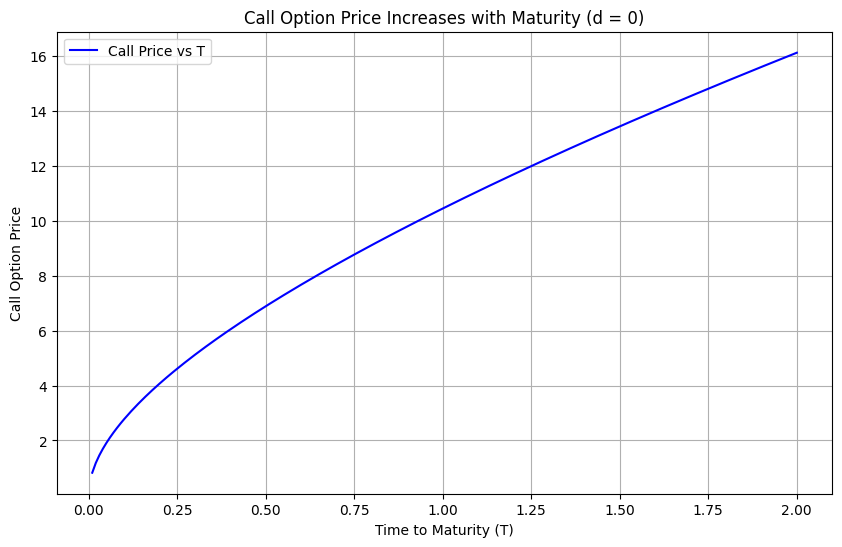

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes call option price
def call_price(S, K, T, r, sigma, d=0):
    d1 = (np.log(S / K) + (r - d + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * np.exp(-d * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Parameters
S = 100
K = 100
r = 0.05
sigma = 0.2
d = 0  # No dividend

# Time to maturity range
T_values = np.linspace(0.01, 2, 200)
call_prices = [call_price(S, K, T, r, sigma, d) for T in T_values]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(T_values, call_prices, color='blue', label='Call Price vs T')
plt.title("Call Option Price Increases with Maturity (d = 0)")
plt.xlabel("Time to Maturity (T)")
plt.ylabel("Call Option Price")
plt.grid(True)
plt.legend()
plt.show()


## Monte Carlo

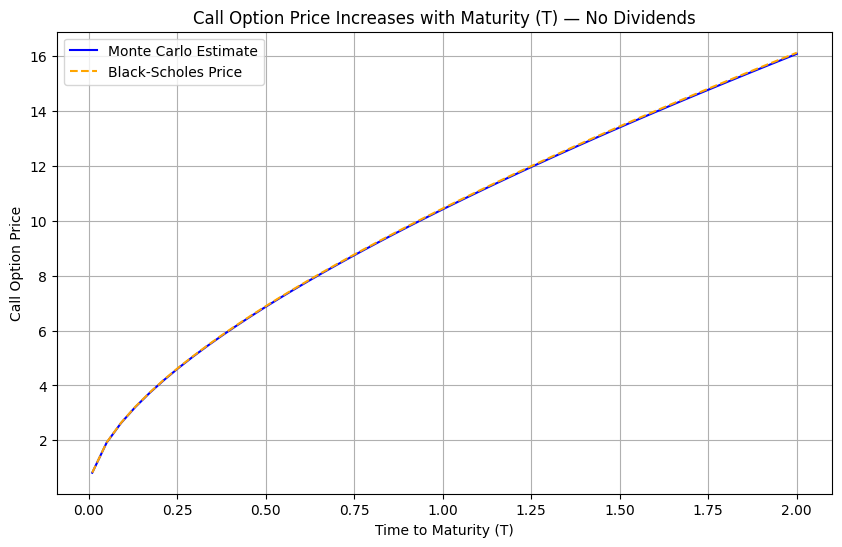

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Function to generate standard normal random numbers
def generate_random_normals(n, seed=None):
    rng = np.random.default_rng(seed)
    return rng.normal(0, 1, size=n)

# Monte Carlo estimator for call price using vectorized formula
def monte_carlo_call_price(S0, K, T, r, sigma, d, N, seed=None):
    W = generate_random_normals(N, seed=seed)
    ST = S0 * np.exp((r - d - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * W)
    payoff = np.maximum(ST - K, 0)
    return np.exp(-r * T) * np.mean(payoff)

# Black-Scholes analytical solution
def black_scholes_call(S0, K, T, r, sigma, d=0):
    d1 = (np.log(S0 / K) + (r - d + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S0 * np.exp(-d * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# --- Parameters ---
S0 = 100      # initial stock price
K = 100       # strike price
r = 0.05      # risk-free rate
d = 0         # dividend yield
sigma = 0.2   # volatility
N = 100000   # number of Monte Carlo paths
seed = 42     # random seed for reproducibility

# --- Compute prices over a range of maturities ---
T_values = np.linspace(0.01, 2.0, 50)
mc_prices = [monte_carlo_call_price(S0, K, T, r, sigma, d, N, seed) for T in T_values]
bs_prices = [black_scholes_call(S0, K, T, r, sigma, d) for T in T_values]

# --- Plot ---
plt.figure(figsize=(10, 6))
plt.plot(T_values, mc_prices, label="Monte Carlo Estimate", color='blue')
plt.plot(T_values, bs_prices, '--', label="Black-Scholes Price", color='orange')
plt.title("Call Option Price Increases with Maturity (T) — No Dividends")
plt.xlabel("Time to Maturity (T)")
plt.ylabel("Call Option Price")
plt.legend()
plt.grid(True)
plt.show()


1. Forward

\begin{equation*}
\text { Payoff }=S_T-K, \quad \text { Price }=e^{-r T} \mathbb{E}\left[S_T-K\right]
\end{equation*}

2. Call Option

\begin{equation*}
\text { Payoff }=\max \left(S_T-K, 0\right), \quad \text { Price }=e^{-r T} \mathbb{E}\left[\max \left(S_T-K, 0\right)\right]
\end{equation*}

3. Put Option

\begin{equation*}
\text { Payoff }=\max \left(K-S_T, 0\right), \quad \text { Price }=e^{-r T} \mathbb{E}\left[\max \left(K-S_T, 0\right)\right]
\end{equation*}

4. Digital Call

\begin{equation*}
\text { Payoff }=1_{S_T>K}, \quad \text { Price }=e^{-r T} \mathbb{E}\left[1_{S_T>K}\right]
\end{equation*}

5. Digital Put

\begin{equation*}
\text { Payoff }=1_{S_T<K}, \quad \text { Price }=e^{-r T} \mathbb{E}\left[1_{S_T<K}\right]
\end{equation*}

6. Zero-Coupon Bond

\begin{equation*}
\text { Price }=e^{-r T}
\end{equation*}


In [84]:
import numpy as np

class MonteCarloPricer:
    def __init__(self, S0, K, T, r, d, sigma, n_paths=1000000, seed=42):
        self.S0 = S0
        self.K = K
        self.T = T
        self.r = r
        self.d = d
        self.sigma = sigma
        self.n_paths = n_paths
        np.random.seed(seed)
    
    def generate_paths(self):
        Z = np.random.randn(self.n_paths)
        ST = self.S0 * np.exp((self.r - self.d - 0.5 * self.sigma ** 2) * self.T + self.sigma * np.sqrt(self.T) * Z)
        return ST
    
    def price_forward(self):
        ST = self.generate_paths()
        payoff = ST - self.K
        return np.exp(-self.r * self.T) * np.mean(payoff)
    
    def price_call(self):
        ST = self.generate_paths()
        payoff = np.maximum(ST - self.K, 0)
        return np.exp(-self.r * self.T) * np.mean(payoff)
    
    def price_put(self):
        ST = self.generate_paths()
        payoff = np.maximum(self.K - ST, 0)
        return np.exp(-self.r * self.T) * np.mean(payoff)
    
    def price_digital_call(self):
        ST = self.generate_paths()
        payoff = (ST > self.K).astype(float)
        return np.exp(-self.r * self.T) * np.mean(payoff)
    
    def price_digital_put(self):
        ST = self.generate_paths()
        payoff = (ST < self.K).astype(float)
        return np.exp(-self.r * self.T) * np.mean(payoff)
    
    def price_zero_coupon_bond(self):
        return np.exp(-self.r * self.T)


In [85]:
pricer = MonteCarloPricer(S0=100, K=100, T=1, r=0.05, d=0.02, sigma=0.2)

print("Forward Price:       ", pricer.price_forward())
print("Call Option Price:   ", pricer.price_call())
print("Put Option Price:    ", pricer.price_put())
print("Digital Call Price:  ", pricer.price_digital_call())
print("Digital Put Price:   ", pricer.price_digital_put())
print("Zero-Coupon Bond:    ", pricer.price_zero_coupon_bond())


Forward Price:        2.866090558085638
Call Option Price:    9.235309486092584
Put Option Price:     6.328574798647327
Digital Call Price:   0.49418366184603546
Digital Put Price:    0.4560916795419044
Zero-Coupon Bond:     0.951229424500714
